In [1]:
%matplotlib inline
import ionsim
import autograd
import autograd.numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from ipywidgets import interact
from scipy.constants import *

rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = (8.0,6.0)
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 18
rc('animation', html='html5')

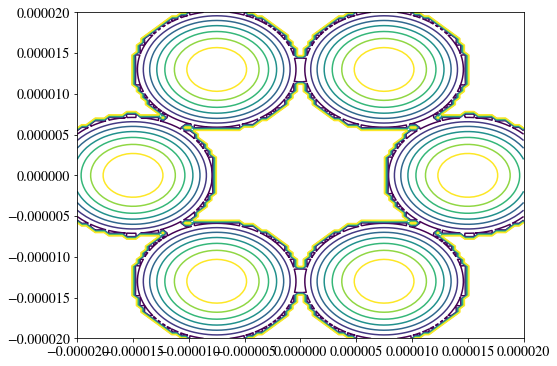

In [21]:
import importlib
importlib.reload(ionsim)

class test(ionsim.IonSim):
    fz = 2.74e6
    d = 15e-6
    theta = np.linspace(0, 2*pi, 6+1)[0:-1]
    xc = (d)*np.cos(theta)
    yc = (d)*np.sin(theta)
    zc = 0*theta
    r_sign = -1
    def U(self, x, y, z, t=0):
        dx = x[:, None] - self.xc
        dy = y[:, None] - self.yc
        dz = z[:, None] - self.zc
        w = dx**2 + dy**2 + dz**2 < (self.d/2)**2
        U0 = (1/2) * self.m * (2*pi*self.fz)**2
        return np.sum(U0*w*(dz**2 - (self.r_sign/2)*(dx**2+dy**2)), 1)

    
sim = test()
sim.kq2 *= -1
sim.m = 9.01 * atomic_mass
sim.x0 = np.array([sim.xc, sim.yc, sim.zc])
eq = sim.equilibrium_position(*sim.x0*0.9)

sim.kq2 *= -1
sim.r_sign *= -1
# @interact(i=(0,17))
# def interact_normal_modes(i=0):
#     ionsim.plot_normal_modes(sim, x, i)
    
# @interact(i=(0,17))
# def interact_penning_modes(i=0):
#     plot_penning_modes(sim, x, np.array([0, 0, 2.5]), i)
x = np.linspace(-20e-6, 20e-6, 100)
y = np.linspace(-20e-6, 20e-6, 100)
X, Y = np.meshgrid(x, y)
# test.U(X.ravel(), Y.ravel(), 0*X.ravel())
Z = sim.U(X.ravel(), Y.ravel(), 0*Y.ravel())
Z = np.reshape(Z, X.shape)
plt.contour(X, Y, Z)

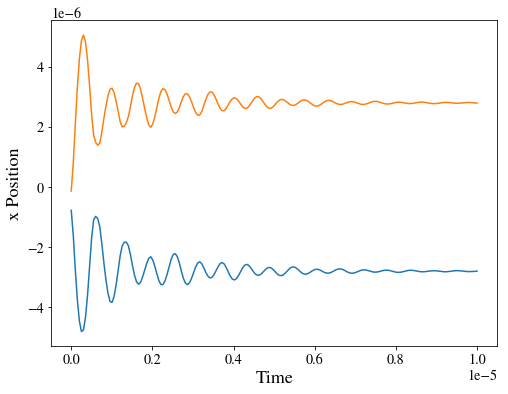

In [139]:
class example1(ionsim.IonSim):
    fx = 1e6
    fy = 2e6
    fz = 3e6    
    def U(self, x, y, z, t=0):
        Ux = (1/2) * self.m * (2*pi*self.fx)**2 * x**2
        Uy = (1/2) * self.m * (2*pi*self.fy)**2 * y**2
        Uz = (1/2) * self.m * (2*pi*self.fz)**2 * z**2
        return Ux + Uy + Uz
    
ex1 = example1()
ex1.m = 40 * atomic_mass
ex1.gamma = ex1.m * 1e6 * np.array([1, 1, 1])
ex1.init_thermal(n=2, T=1e-3, sigma=(1e-6, 1e-6, 1e-6))
t = np.linspace(0, 10e-6, 200)
ex1.run(t)

# @interact(i=(0,5))
# def ex1_normal_modes(i=0):
#     ionsim.plot_normal_modes(ex1, i, surface=False)
ionsim.plot(ex1)

In [141]:
x1 = ex1.x[-1,0:3,:]
x2 = ex1.equilibrium_position(*ex1.x0[0:3,:], tol=ex1.kq2)

In [142]:
x1

array([[ -2.79875808e-06,   2.79266797e-06],
       [ -1.56219513e-08,   3.80881699e-09],
       [ -1.33854790e-08,   1.57983323e-08]])

In [143]:
x2

array([[ -2.80184727e-06,   2.80184727e-06],
       [  3.86080644e-17,  -2.12065981e-17],
       [  8.84977644e-19,   4.64514851e-18]])

In [23]:
class example2(ionsim.IonSim):
    def U(self, t, x, y, z):
        self.fx = 1e6
        self.fy = 1e6
        self.fz = 10e6
        Ux = (1/2) * self.m * (2*pi*self.fx)**2 * x**2
        Uy = (1/2) * self.m * (2*pi*self.fy)**2 * y**2
        Uz = (1/2) * self.m * (2*pi*self.fz)**2 * z**2
        return Ux + Uy + Uz
    
ex2 = example2()
ex2.m = 40 * atomic_mass
ex2.gamma = ex1.m * 1e6 * np.array([1, 1, 1])
ex2.init_thermal(n=50, T=1e-3, sigma=(1e-6, 1e-6, 1e-6))
t = np.linspace(0, 20e-6, 200)
ex2.run(t)

ionsim.plot(ex2)
ionsim.animate(ex2)
@interact(i=(0,149))
def ex1_normal_modes(i=0):
    ionsim.plot_normal_modes(ex2, i, surface=False)

In [33]:
class example3(ionsim.IonSim):
    def U(self, t, x, y, z):
        self.fx = 1e6
        self.fy = 10e6
        self.fz = 10e6
        Ux = (1/2) * self.m * (2*pi*self.fx)**2 * x**2
        Uy = (1/2) * self.m * (2*pi*self.fy)**2 * y**2
        Uz = (1/2) * self.m * (2*pi*self.fz)**2 * z**2
        return Ux + Uy + Uz
    
ex3 = example3()
ex3.m = np.array([9, 40, 40, 9]) * atomic_mass
ex3.gamma = ex1.m * 1e6 * np.array([1, 1, 1])
ex3.init_thermal(n=4, T=10e-3, sigma=(1e-6, 1e-6, 1e-6))
t = np.linspace(0, 20e-6, 200)
ex3.run(t)

# ionsim.plot(ex3)
# ionsim.animate(ex3)
@interact(i=(0,11))
def ex3_normal_modes(i=0):
    ionsim.plot_normal_modes(ex3, i, surface=False)

/scratch/python36/lib/python3.6/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


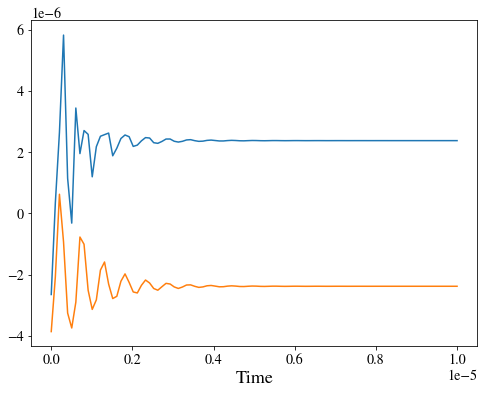

In [19]:
class example4(ionsim.IonSim):
    def U(self, t, x, y, z):
        m = self.m / atomic_mass
        Ux = (1/2)*self.m*(1e6*np.sqrt(2584/m))**2*x**2
        Uy = (1/2)*self.m*(1e6*np.sqrt(323679/m**2 + 8525/m))**2*y**2
        Uz = (1/2)*self.m*(1e6*np.sqrt(580227/m**2 - 11064/m))**2*z**2
        return Ux + Uy + Uz
    
ex4 = example4()
ex4.gamma = 24 * atomic_mass * 2e6 * np.array([1, 1, 1])
ex4.init_thermal(n=2, T=5e-3, sigma=(5e-6, 5e-6, 5e-6))
ex4.m = np.array([9, 24]) * atomic_mass
t = np.linspace(0, 10e-6, 100)
ex4.run(t)
ionsim.plot(ex4, dim=0)
# plt.ylabel('X (m)');

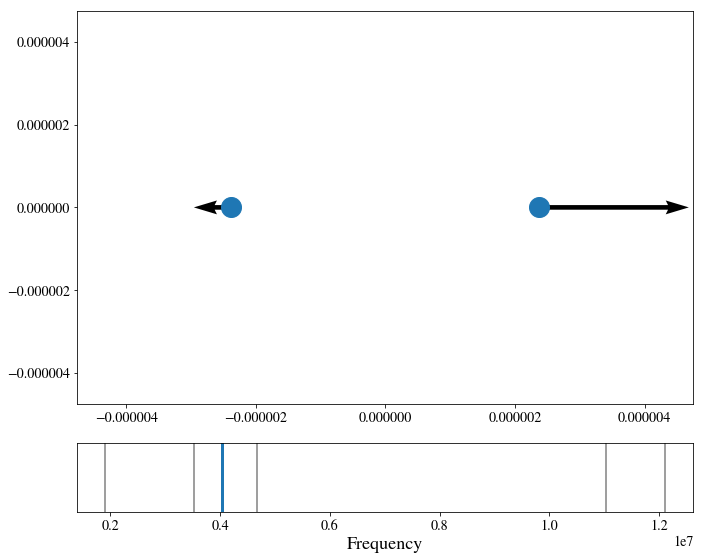

In [30]:
ionsim.plot_normal_modes(ex4, scale=4, i=2, surface=False)